<a href="https://colab.research.google.com/github/Saigirish-Suryadevara/Saigirish_INFO5731_Fall2024/blob/main/Saigirish_Suryadevara_Assignment_3_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import pandas as pd

path_file = '/content/Movie_Review.csv'
movie_review_df = pd.read_csv(path_file)

# extracting review column for further process
movie_review = movie_review_df['Review'].dropna().tolist()

# implemeting N-gram analysis using extracted review

def tokenise(reviews):
  reviews = reviews.lower()
  tokens = []
  word = ""
  for char in reviews:
    if char.isalnum():
      word += char
    elif word:
      tokens.append(word)
      word = ""
  if word:
    tokens.append(word)
  return tokens

# Counting frequency of all trigrams (N=3)
def ngrams_count(review, n):
  count_ngram = {}
  for r in review:
    tokens = tokenise(r)
    for i in range(len(tokens)-n+1):
      ngram = tuple(tokens[i:i+n])
      if ngram in count_ngram:
        count_ngram[ngram] += 1
      else:
        count_ngram[ngram] = 1
  return count_ngram
# getting trigram count
count_trigram = ngrams_count(movie_review, 3)

# Calculating probablity of all bigrams in dataset
def count_bigrams_unigrams(review):
    count_bigram = {}
    count_unigram = {}
    for r in review:
        tokens = tokenise(r)
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i+1])
            unigram = tokens[i]

            # Counting bigram
            count_bigram[bigram] = count_bigram.get(bigram, 0) + 1
            # Counting unigram
            count_unigram[unigram] = count_unigram.get(unigram, 0) + 1

        # Counting last word as unigram
        lastword = tokens[-1]
        count_unigram[lastword] = count_unigram.get(lastword, 0) + 1
    return count_unigram, count_bigram

# Calculating bigram & unigram counts
count_unigram, count_bigram = count_bigrams_unigrams(movie_review)

# Calculating probabilities of bigrams
probabilities_bigram = {}
for bigram, count in count_bigram.items():
    w1 = bigram[0]
    if w1 in count_unigram and count_unigram[w1] > 0:
        probabilities_bigram[bigram] = count / count_unigram[w1]

# Extracting noun phrases & calculating relative probablity
def get_noun(tokens):
  adj = ["nice", "good", "great", "amazing", "fantastic", "awesome"]
  noun_words = []
  for i in range(len(tokens) - 1):
    if tokens[i] in adj:
      noun_words.append((tokens[i], tokens[i+1]))
  return noun_words
# getting noun counts across all reviews
noun_word_counts = {}
review_noun_words = []

for r in movie_review:
  tokens = tokenise(r)
  words = get_noun(tokens)
  count_review = {}

  for phrase in words:
    if phrase in noun_word_counts:
      noun_word_counts[phrase] += 1
    else:
      noun_word_counts[phrase] = 1

print_output = {
    "count_trigram":count_trigram,
    "probabilities_bigram": probabilities_bigram,
    "noun_word_counts": noun_word_counts
}

print_output






{'count_trigram': {('spoiler', 'free', 'part'): 2,
  ('free', 'part', 'it'): 2,
  ('part', 'it', 'feels'): 2,
  ('it', 'feels', 'like'): 12,
  ('feels', 'like', 'every'): 2,
  ('like', 'every', 'john'): 2,
  ('every', 'john', 'wick'): 2,
  ('john', 'wick', 'movie'): 12,
  ('wick', 'movie', 'is'): 4,
  ('movie', 'is', 'a'): 27,
  ('is', 'a', 'remastered'): 2,
  ('a', 'remastered', 'version'): 2,
  ('remastered', 'version', 'of'): 2,
  ('version', 'of', 'a'): 4,
  ('of', 'a', 'previous'): 2,
  ('a', 'previous', 'one'): 2,
  ('previous', 'one', 'better'): 2,
  ('one', 'better', 'choreography'): 2,
  ('better', 'choreography', 'better'): 2,
  ('choreography', 'better', 'fight'): 2,
  ('better', 'fight', 'scenes'): 2,
  ('fight', 'scenes', 'better'): 2,
  ('scenes', 'better', 'visuals'): 2,
  ('better', 'visuals', 'bigger'): 2,
  ('visuals', 'bigger', 'budged'): 2,
  ('bigger', 'budged', 'but'): 2,
  ('budged', 'but', 'it'): 2,
  ('but', 'it', 's'): 96,
  ('it', 's', 'more'): 7,
  ('s', 'mo

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import math
import pandas as pd

path_file = '/content/Movie_Review.csv'
movie_review_df = pd.read_csv(path_file)

# extracting review column for further process
movie_review = movie_review_df['Review'].dropna().tolist()

# tokenizing text

def tokenise(review):
  review = review.lower()
  tokens = []
  word = ""
  for char in review:
    if char.isalnum():
      word += char
    elif word:
      tokens.append(word)
      word = ""
  if word:
    tokens.append(word)
  return tokens

# calculating TF for each doc
def get_tf(document):
  tf = []
  for doc in document:
    tokens = tokenise(doc)
    count_term = {}
    for word in tokens:
      count_term[word] = count_term.get(word,0)+1
    all_terms = len(tokens)
    tf_doc = {word: count/all_terms for word,count in count_term.items()}
    tf.append(tf_doc)
  return tf

# calculating IDF
def get_idf(document):
  doc_num = len(document)
  doc_frequency = {}
  for doc in document:
    tokens = set(tokenise(doc))
    for word in tokens:
      doc_frequency[word]=doc_frequency.get(word,0)+1
  idf = {word: math.log(doc_num/df) for word,df in doc_frequency.items()}
  return idf

# Building Tf-Idf matrix
def build_matrix(document):
  tf = get_tf(document)
  idf = get_idf(document)
  matrix_tfidf = []
  for tf_doc in tf:
    tfidf_doc = {word: tf_doc[word]*idf[word] for word in tf_doc}
    matrix_tfidf.append(tfidf_doc)
  return matrix_tfidf, idf


# Calculating Cosine similarities
def cosine_sim(v1,v2):
  dot_prod = sum(v1[word]*v2.get(word,0) for word in v1)
  v1_norm = math.sqrt(sum(value**2 for value in v1.values()))
  v2_norm = math.sqrt(sum(value**2 for value in v2.values()))
  return dot_prod/(v1_norm*v2_norm) if v1_norm and v2_norm else 0

# creating Tfidf vector for query
def vector_query(query, idf):
  tokens_query = tokenise(query)
  tf_query={}
  for word in tokens_query:
    tf_query[word] = tf_query.get(word,0)+1
  length_query = len(tokens_query)
  tf_query = {word: count/length_query for word,count in tf_query.items()}
  tfidf_query = {word: tf_query[word]*idf.get(word,0) for word in tf_query}
  return tfidf_query

# Ranking documents by similarity with query
def rank_doc(document, query):
  matrix_tfidf, idf = build_matrix(document)
  tfidf_query = vector_query(query, idf)
  cosine_score = []
  for indx, doc_tfidf in enumerate(matrix_tfidf):
    score = cosine_sim(doc_tfidf,tfidf_query)
    cosine_score.append((indx,score))
  ranked_doc = sorted(cosine_score, key=lambda x: x[1], reverse=True)
  return ranked_doc

# defining query
query = "An excellent action movie with great characters and story"

#ranking documents on query based
matrix_tfidf, idf = build_matrix(movie_review)
ranked_docs = rank_doc(movie_review, query)

# pritning results
print("TF_IDF matrix:")
for i, tfidf_doc in enumerate(matrix_tfidf, start = 1):
  print(f"Document{i}: {tfidf_doc}")

print("Ranked Documents on query based:")
for rank,(indx_doc, score) in enumerate(ranked_docs, start=1):
  print(f"Rank {rank}: Document {indx_doc+1} with score similarity {score:.4f}")









TF_IDF matrix:
Document1: {'spoiler': 0.005778432710474671, 'free': 0.004572491011505136, 'part': 0.004497063876187277, 'it': 0.004755427676538725, 'feels': 0.010090587911083389, 'like': 0.00861888999138032, 'every': 0.0035839786171445362, 'john': 0.019362386665806034, 'wick': 0.02866815150764888, 'movie': 0.00499389224921585, 'is': 0.0014503617404380237, 'a': 0.0007186102427350967, 'remastered': 0.008631854261803032, 'version': 0.004010873058070064, 'of': 0.001094208644026171, 'previous': 0.0072338415484232334, 'one': 0.0010444580959355428, 'better': 0.008268089489310126, 'choreography': 0.025943748180896925, 'fight': 0.021517608499472107, 'scenes': 0.003544819812656747, 'visuals': 0.008106409311645676, 'bigger': 0.005561740804477638, 'budged': 0.008631854261803032, 'but': 0.0038174854412004423, 's': 0.003112595089446858, 'more': 0.0008462714462531608, 'or': 0.003243720864865315, 'less': 0.003325612056600418, 'the': 0.0013240255673594317, 'same': 0.007435080718044061, 'with': 0.001254

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

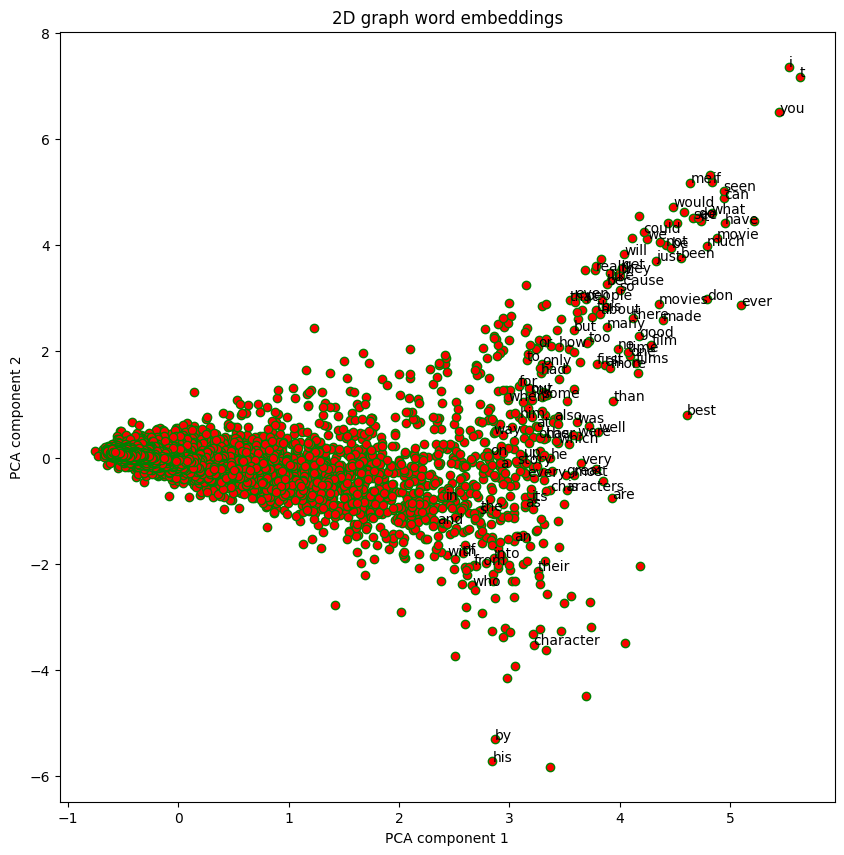

In [5]:
# Write your code here
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# loading dataset
file_path = '/content/Movie_Review.csv'
movie_review_df = pd.read_csv(file_path)

review = movie_review_df['Review'].dropna().tolist()

# function for preprocessing data
def review_prep(review):
  review_tokenised = []
  for r in review:
    r = re.sub(r'\W+', ' ', r.lower())
    tokens = r.split()
    review_tokenised.append(tokens)
  return review_tokenised

# tokenizing reviews
review_tokenised = review_prep(review)

#training Word2Vec model with 300 dim's
word2vec_model = Word2Vec(sentences= review_tokenised, vector_size=300, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec_300.model")

#visualising of word embeddings
words = list(word2vec_model.wv.index_to_key)
word_vector = word2vec_model.wv[words]

# reducing dimensionality to 2D
pca_2d = PCA(n_components=2)
word_vector_2d = pca_2d.fit_transform(word_vector)

plt.figure(figsize = (10,10))
plt.scatter(word_vector_2d[:, 0], word_vector_2d[:, 1], edgecolors= 'g', c='r')

#annotating each point with word it represnts
for i, word in enumerate(words[:100]):
  plt.annotate(word, (word_vector_2d[i,0], word_vector_2d[i,1]))

plt.title("2D graph word embeddings")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()






## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Saigirish-Suryadevara/Saigirish_INFO5731_Fall2024/blob/main/Movie_Review_Sentiment.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer